<a href="https://colab.research.google.com/github/Liranbz/Deep-Learning-workshop/blob/master/nn_4_cnn_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eyaler/workshop/blob/master/nn_4_cnn.ipynb)

# 4. Convolutional Neural Networks

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import Input, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [0]:
# load dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#We want to improve the model so we removed it
#x_train = np.mean(x_train, axis=-1, keepdims=True)
#x_test = np.mean(x_test, axis=-1, keepdims=True)
print(x_train.shape, y_train.shape)

train_size = len(y_train)
test_size = len(y_test)
xdim = x_train.shape[1]
ydim = x_train.shape[2]

print(x_train.dtype, y_train.dtype)

(50000, 32, 32, 3) (50000, 1)
uint8 uint8


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


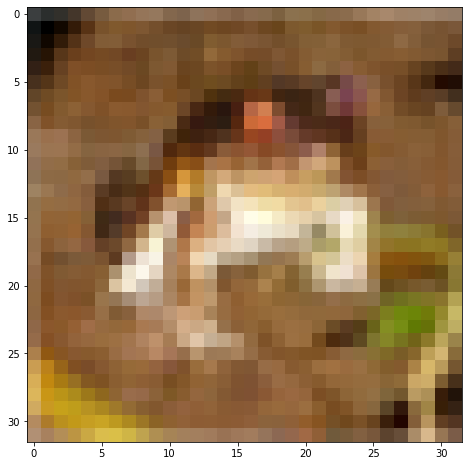

In [0]:
print(x_train[0])
print(y_train[0])
if x_train.shape[-1]==1:
  plt.imshow(x_train[0][...,0],cmap='gray')
else:
  plt.imshow(x_train[0])

In [0]:
print(np.min(x_train), np.max(x_train), np.median(x_train))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

0 255 117.0
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [0]:
n_classes = len(np.unique(y_test))
x_train, y_train = shuffle(x_train, y_train, random_state=44)
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [0]:
def get_model():
    inputs= Input (shape=(32,32,3))
    f=Conv2D(filters=32,kernel_size=3,activation="relu")(inputs)
    f=MaxPooling2D()(f)
    f=Conv2D(filters=32,kernel_size=3,activation="relu")(inputs)
    f=MaxPooling2D()(f)
    f=Conv2D(filters=32,kernel_size=3,activation="relu")(inputs)
    f=MaxPooling2D()(f)
    f=Conv2D(filters=32,kernel_size=3,activation="relu")(inputs)
    f=MaxPooling2D()(f)
    f=Flatten()(f)
    f=Dense(100,activation='relu')(f)
    outputs = Dense(n_classes, activation='softmax')(f)
    return Model(inputs=inputs, outputs=outputs)

In [0]:
epochs = 20
batch_size = 128

In [0]:
model = get_model()
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 2s 60us/step - loss: 2.0618 - acc: 0.2619 - val_loss: 1.9732 - val_acc: 0.2655
Epoch 2/20
40000/40000 [==============================] - 2s 52us/step - loss: 1.8721 - acc: 0.3429 - val_loss: 1.8627 - val_acc: 0.3290
Epoch 3/20
40000/40000 [==============================] - 2s 51us/step - loss: 1.7869 - acc: 0.3759 - val_loss: 1.7825 - val_acc: 0.3734
Epoch 4/20
40000/40000 [==============================] - 2s 51us/step - loss: 1.7163 - acc: 0.4051 - val_loss: 1.7122 - val_acc: 0.3958
Epoch 5/20
40000/40000 [==============================] - 2s 50us/step - loss: 1.6550 - acc: 0.4247 - val_loss: 1.9325 - val_acc: 0.3272
Epoch 6/20
40000/40000 [==============================] - 2s 50us/step - loss: 1.5913 - acc: 0.4476 - val_loss: 1.6520 - val_acc: 0.4073
Epoch 7/20
40000/40000 [==============================] - 2s 50us/step - loss: 1.5308 - acc: 0.4647 - val_loss: 1.5327 - val_acc

In [0]:
# Augmentations

model = get_model()
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator()

valid_idx = int(train_size*0.8)
aug_train_data = datagen.flow(x=x_train[:valid_idx], y=y_train[:valid_idx], batch_size=batch_size, seed=45)
valid_data = (x_train[valid_idx:], y_train[valid_idx:])
history = model.fit_generator(aug_train_data, epochs=epochs, steps_per_epoch=valid_idx // batch_size, validation_data=valid_data)

Epoch 1/20
312/312 [==============================] - 2s 7ms/step - loss: 2.1436 - acc: 0.2306 - val_loss: 1.9946 - val_acc: 0.3056
Epoch 2/20
312/312 [==============================] - 2s 6ms/step - loss: 1.9258 - acc: 0.3201 - val_loss: 1.8663 - val_acc: 0.3508
Epoch 3/20
312/312 [==============================] - 2s 7ms/step - loss: 1.8288 - acc: 0.3578 - val_loss: 1.7951 - val_acc: 0.3742
Epoch 4/20
312/312 [==============================] - 2s 7ms/step - loss: 1.7450 - acc: 0.3936 - val_loss: 1.7339 - val_acc: 0.3932
Epoch 5/20
312/312 [==============================] - 2s 7ms/step - loss: 1.6713 - acc: 0.4146 - val_loss: 1.6599 - val_acc: 0.4123
Epoch 6/20
312/312 [==============================] - 2s 6ms/step - loss: 1.6023 - acc: 0.4384 - val_loss: 1.5919 - val_acc: 0.4364
Epoch 7/20
312/312 [==============================] - 2s 6ms/step - loss: 1.5449 - acc: 0.4595 - val_loss: 1.5629 - val_acc: 0.4446
Epoch 8/20
312/312 [==============================] - 2s 6ms/step - loss: 1.

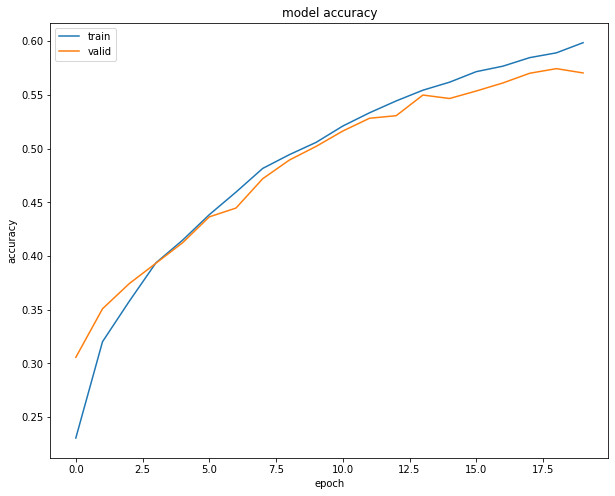

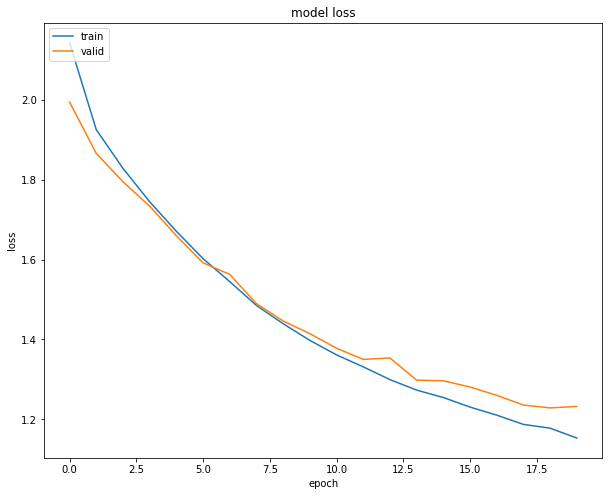

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
loss, acc = model.evaluate(x=x_test, y=y_test)
print(loss, acc)
targets = np.argmax(y_test, axis=-1)
probabilities = model.predict(x=x_test)
predictions = np.argmax(probabilities, axis=-1)
cm = confusion_matrix(y_true=targets, y_pred=predictions)
print(cm)

10000/10000 [==============================] - 0s 47us/step
1.5066704034805298 0.4674
[[428  37  97  27  74  20  39  32 208  38]
 [ 32 556   5  23  29   5  85  38  96 131]
 [ 62  13 315  72 218  98 118  54  38  12]
 [ 37  24  87 247 139 182 143  87  22  32]
 [ 25  16 110  48 482  56 120 106  31   6]
 [ 18   8  75 142 123 432  73 110  13   6]
 [ 13  29  69  75 133  24 586  37  12  22]
 [ 18  26  33  63 128  77  51 542  23  39]
 [120  83  37  23  27  22  14  19 620  35]
 [ 46 177  16  36  15  16  75  60  93 466]]


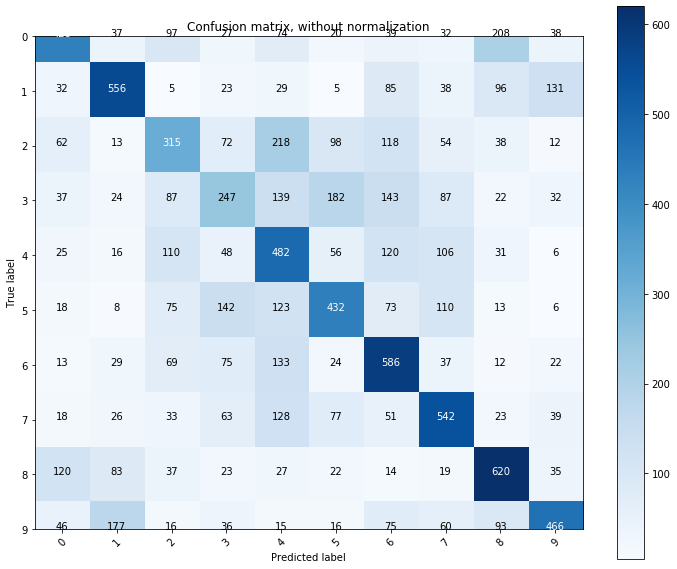

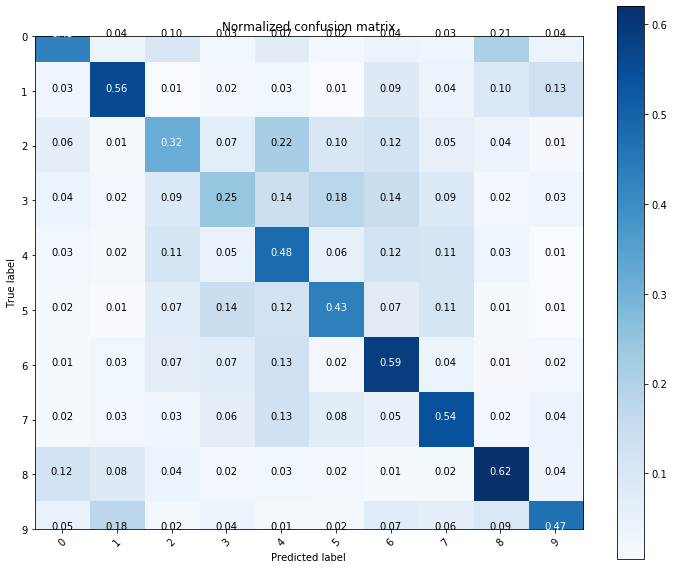

In [0]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    np.set_printoptions(precision=2)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

classes = np.arange(n_classes)
plot_confusion_matrix(cm, classes=classes)
plot_confusion_matrix(cm, classes=classes, normalize=True)

In [0]:
from sklearn.metrics import classification_report
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
report = classification_report(y_true=targets, y_pred=predictions, labels=classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.54      0.43      0.48      1000
  automobile       0.57      0.56      0.56      1000
        bird       0.37      0.32      0.34      1000
         cat       0.33      0.25      0.28      1000
        deer       0.35      0.48      0.41      1000
         dog       0.46      0.43      0.45      1000
        frog       0.45      0.59      0.51      1000
       horse       0.50      0.54      0.52      1000
        ship       0.54      0.62      0.58      1000
       truck       0.59      0.47      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



loss	index	true		predicted	probability
0.9023	9560	truck		horse		0.8805
0.8496	9169	automobile		ship		0.9570
0.8380	2495	truck		ship		0.2394
0.8259	8644	ship		horse		0.3128
0.8227	8161	dog		horse		0.9778
0.7850	5838	deer		automobile		0.6541
0.7819	2366	truck		horse		0.5796
0.7802	6510	deer		automobile		0.5969
0.7790	4754	cat		airplane		0.4861
0.7571	6821	airplane		dog		0.4771


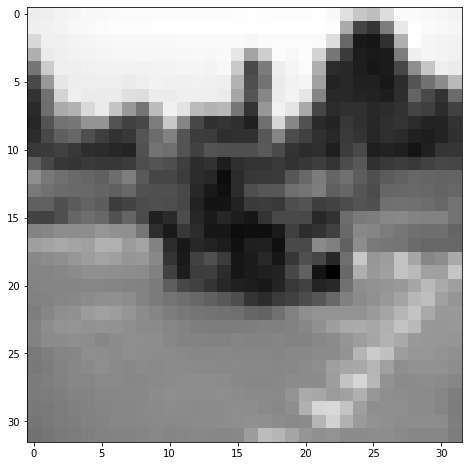

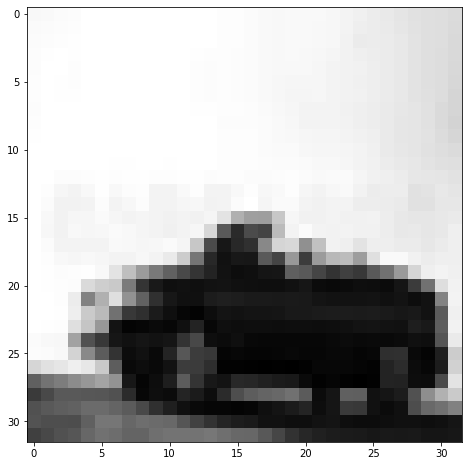

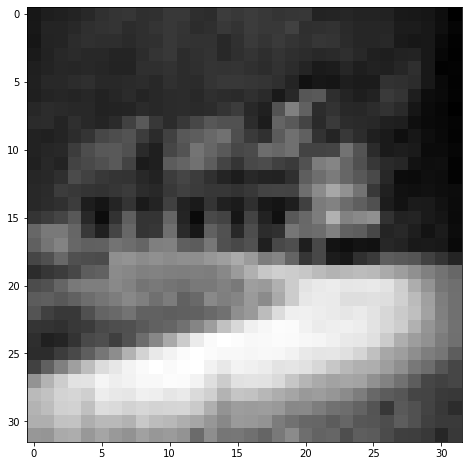

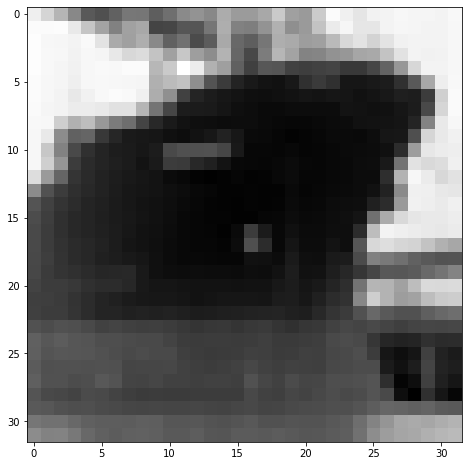

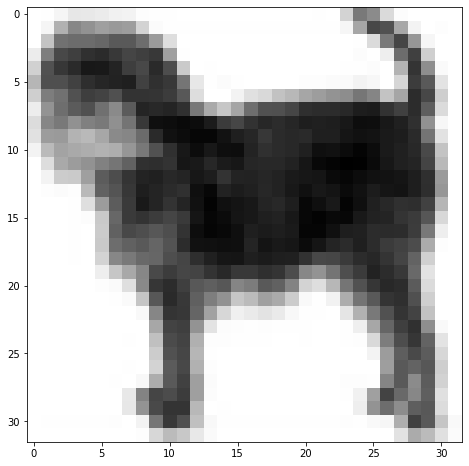

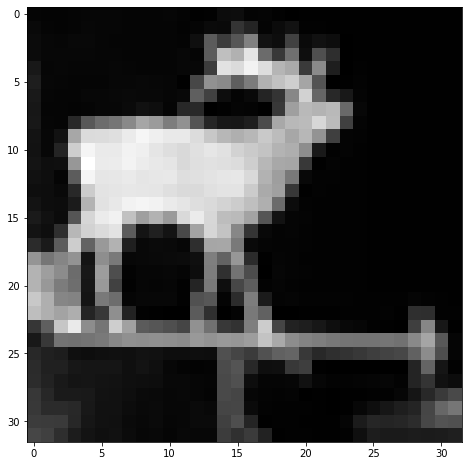

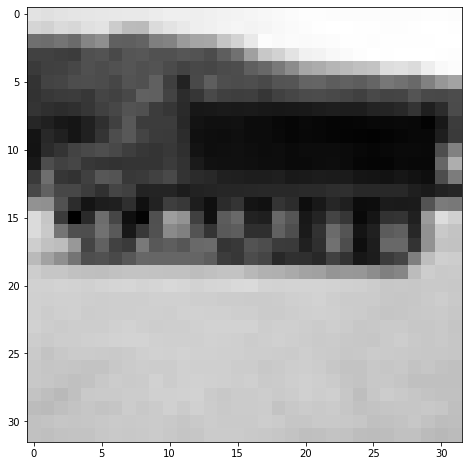

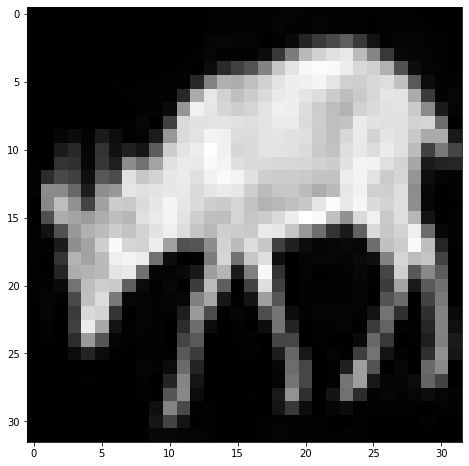

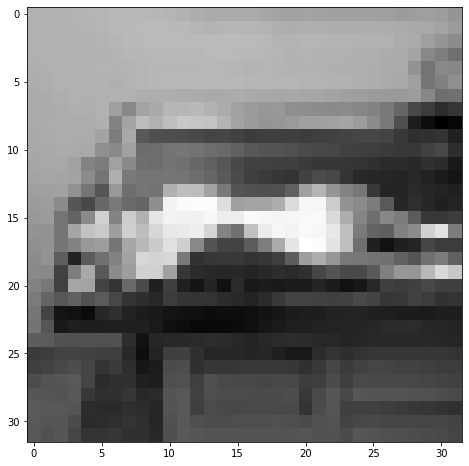

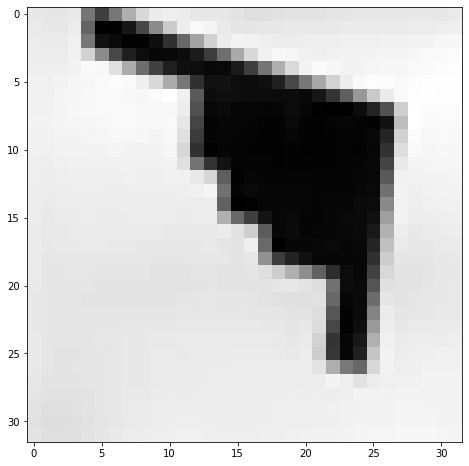

In [0]:
# top errors
from sklearn.metrics import log_loss
max_probs = np.max(probabilities, axis=-1)
losses = [log_loss(y_true=y, y_pred=prob, eps=1e-7) for y,prob in zip(y_test,probabilities)]
print('loss\tindex\ttrue\t\tpredicted\tprobability')
top_errors = sorted(list(zip(losses, np.arange(test_size), [class_names[t] for t in targets], [class_names[p] for p in predictions], max_probs)), reverse=True)[:10]
for error in top_errors:
    print('%.04f\t%d\t%s\t\t%s\t\t%.04f'%error)
    plt.figure()
    if x_test.shape[-1]==1:
      plt.imshow(x_test[error[1]][...,0], cmap='gray')
    else:
      plt.imshow(x_test[error[1]])

# EX:
# 1. do CIFAR-10 (gray) with a CNN:
# a. start with the cifar solution to ex2
# b. rewrite the model to use convoltions and max-pooling
# c. don't optimize too much, just try to get a smaller validation error than ex2, with less degrees of freedom (see model.summary)
# 2. do CIFAR-10 (rgb) with a CNN:
# a. rewrite the code to deal with rgb channel
# b. use an architecture of the form: conv-conv-maxpool-dropout-conv-conv-maxpool-dropout-flatten-dense-dropout-dense+softmax
# c. look at the data, overfit, generalize (strive to validation accuracy>0.8), evaluate
# d. calculate the number of degrees of freedom by hand (remember the biases), compare to model.summary(), show your calculation
# e. add batch normalization after each conv-relu. does it help? was it worthwhile in terms of additional degrees of freedom and training time?
# g. add horizontal flips, and small horizontal and vertical shifts random data augmentation. can you get better results?
# h. bonus: there is an ongoing debate whether to put batch-norm before or after the relu. compare (you will need seperate the relu from the conv)